## Imports

In [1]:
import mltlk
print(mltlk.__version__)
from mltlk import *
from sklearn.svm import LinearSVC

0.1.32


## Load data
Load data, clean text and use bag-of-words + TF-IDF preprocessing.

In [2]:
session = load_data("data/wikipedia_300.csv.gz",
                    preprocess="bag-of-words",
                    tf_idf=True,
                    stopwords=["english","stopwords/custom.csv"],
                    clean_text="letters digits",
                    max_features = 10000,
)

Info: Clean texts keeping letters and digits
Info: Load 180 stopwords from english, stopwords/custom.csv
Info: Used bag-of-words with stopwords removed and TF-IDF
Info: Loaded 300 examples in 2 categories


#### Show data stats

In [3]:
data_stats(session)

## Evaluate model using cross-validation
Build a LinearSVC model and evaluate results using 10-fold cross-validation.

Info: Building and evaluating model using 10-fold cross validaton took 0.15 sec



Results,
Accuracy:,95.33%
F1-score:,95.33%
Precision:,95.37%
Recall:,95.33%


Programming,96.67%,145,150
Games,3.45%,5,
Games,94.00%,141,150
Programming,6.38%,9,


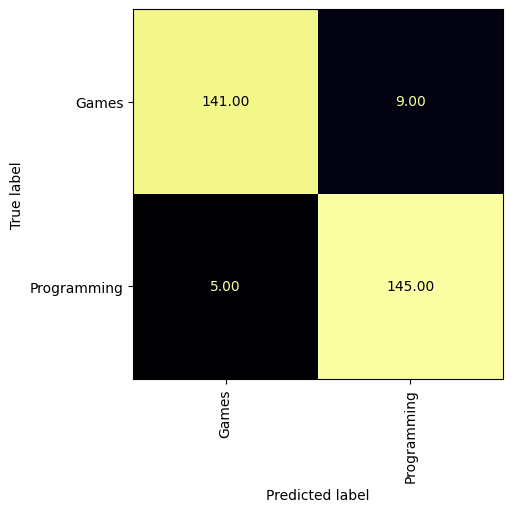

In [4]:
evaluate_model(LinearSVC(), 
               session, 
               reload=False,
               mode="CV-10",
               categories=True,
               confusionmatrix=True,
)

## Evaluate model using train-test split
Build a LinearSVC model and evaluate results using train-test split.

In [5]:
split_data(session,
           test_size=0.15,
           seed=42,
           stratify=True,
)

Info: Split data using 85% training data (255 samples) and 15% test data (45 samples) with seed 42 and stratify


In [6]:
evaluate_model(LinearSVC(), 
               session, 
               reload=False,
               mode="split",
               categories=True,
)

Info: Building and evaluating model using train-test split took 0.02 sec



Results,
Accuracy:,93.33%
F1-score:,93.31%
Precision:,94.13%
Recall:,93.33%


Programming,100.00%,22,22
Games,86.96%,20,23
Programming,15.00%,3,


## Build final model and predict example
Build final model using all data and predict an unknown example.

In [7]:
build_model(LinearSVC(), session)
predict("This is an article about gamers - people who love playing games", session)

Info: Building final model on all data took 0.02 sec (accuracy 100.00%)
Info: Example is predicted as Games
